In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
%matplotlib inline

Source Code:
https://mapattack.wordpress.com/2017/02/12/using-python-for-stocks-1/

In [2]:
import pandas as pd
import numpy as np
listofcsv=["^DJI.csv","^GSPC.csv","^IXIC.csv","^RUT.csv" ,"^TNX.csv"]
def graph(a):
    data = pd.read_csv(a)
    df= pd.DataFrame(data)
    df=df.set_index('Date')
    df['Adj Close'].plot(legend=True, figsize=(10, 5), title='Adjusted Closing Price', label=a.split('.')[0])
   

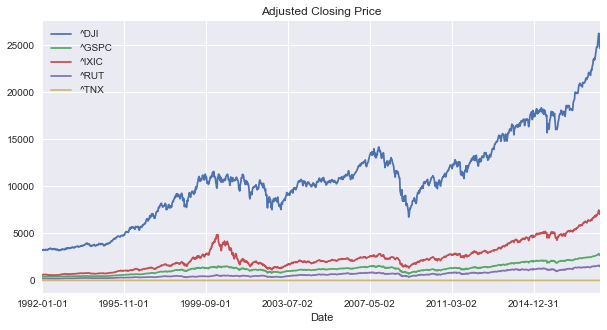

In [39]:
#graph adjusted closing price
for i in listofcsv:
    graph(i)

In [3]:

import math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
def graph_lr(a):
    data = pd.read_csv(a)
    df = data[['Date','Adj Close']]
    lr_df=df
    lr_df['Adj Close Price'] = lr_df['Adj Close']    
    lr_df['x'] = np.arange(len(lr_df))  # create x-col of continuous integers

    lr_df = lr_df.dropna()    # Drop the rows that contain missing days
    lin_reg = LinearRegression()
    lin_reg.fit(X=lr_df['x'].values[:, np.newaxis], y=lr_df['Adj Close Price'].values[:, np.newaxis])
    
    lr_df['Prediction'] = lin_reg.predict(lr_df['x'].values[:, np.newaxis])     # Make predictions w.r.t. 'x' and store it in a column called 'Prediction'
    t= a.split('.')[0]+ ' ' + 'Adjusted Closing Price Linear Regression'
    lr_df[['Adj Close Price', 'Prediction','Date']].plot(legend=True, figsize=(10, 5), title=t, x='Date')


/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


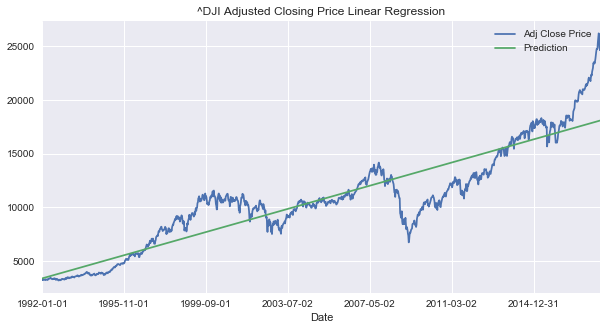

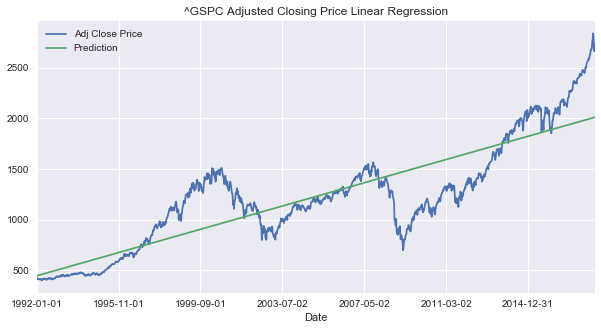

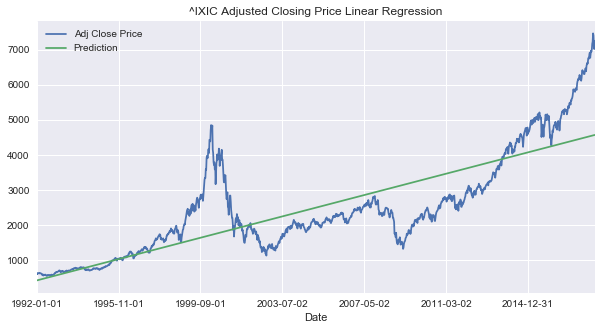

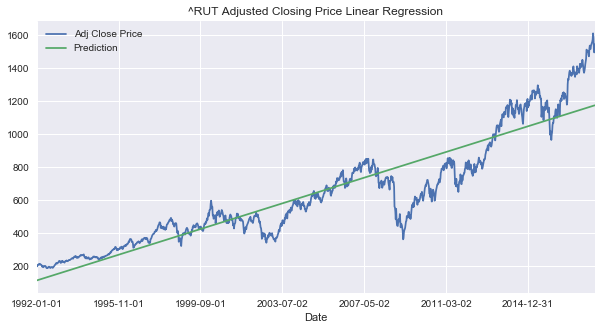

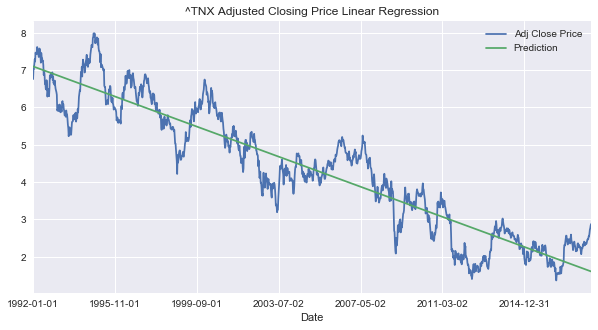

In [42]:
#graph linear regression
for i in listofcsv:
    graph_lr(i)

The Augmented Dickey–Fuller Test (ADF) tests the null hypothesis that a unit root is present in a time series data. When using this test it is assumed that the time series stems from some autoregressive process of order p (AR(p)). Thus, the ADF tests the following regression model

\Delta y_t = \alpha + \delta y_{t-1} + \sum_{i=1}^p \Delta \beta_p y_{t-p} + \varepsilon_t

where \Delta is the difference operator, \alpha is a constant, and\delta is the autoregressive lag coefficient. The ADF then tests the hypothesis

H_0: \gamma = 0, the time series is non-stationary, against
H_1: \gamma \leq 0, the time series is stationary.
Refernces: http://dacatay.com/data-science/part-3-time-series-stationarity-python/

In [88]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)
 
# apply the function to the time series
data = pd.read_csv("^DJI.csv")

ac = data['Adj Close']
adf_test(ac)

Results of Augmented Dickey-Fuller test:
test statistic             1.287077
p-value                    0.996536
# of lags                  2.000000
# of observations       1361.000000
Critical Value (1%)       -3.435164
Critical Value (5%)       -2.863666
Critical Value (10%)      -2.567902
dtype: float64


Because the test statistic is above the 5% critical value and the p-value is larger than 0.05 the moving average is not constant over time. This means that the null hypothesis of the Augmented Dickey-Fuller test cannot be rejected, the series is not stationary.

In [89]:
import statsmodels
import statsmodels.api as sm
from statsmodels.compat.pandas import sort_values
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf

def ts_diagnostics(y, lags=None, title='', filename=''):
    '''
    Calculate acf, pacf, qq plot and Augmented Dickey Fuller test for a given time series
    '''
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    # weekly moving averages (5 day window because of workdays)
    rolling_mean = pd.rolling_mean(y, window=12)
    rolling_std = pd.rolling_std(y, window=12)
    
    fig = plt.figure(figsize=(14, 12))
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    qq_ax = plt.subplot2grid(layout, (2, 0))
    hist_ax = plt.subplot2grid(layout, (2, 1))
    
    # time series plot
    y.plot(ax=ts_ax)
    rolling_mean.plot(ax=ts_ax, color='crimson');
    rolling_std.plot(ax=ts_ax, color='darkslateblue');
    plt.legend(loc='best')
    ts_ax.set_title(title, fontsize=24);
    
    # acf and pacf
    statsmodels.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    statsmodels.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    #smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5) 
    
    # qq plot
    sm.qqplot(y, line='s', ax=qq_ax)
    qq_ax.set_title('QQ Plot')
    
    # hist plot
    y.plot(ax=hist_ax, kind='hist', bins=25);
    hist_ax.set_title('Histogram');
    plt.tight_layout();
    #plt.savefig('./img/{}.png'.format(filename))
    plt.show()
    
    # perform Augmented Dickey Fuller test
    print('Results of Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return

/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  from ipykernel import kernelapp as app
/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  app.launch_new_instance()
/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


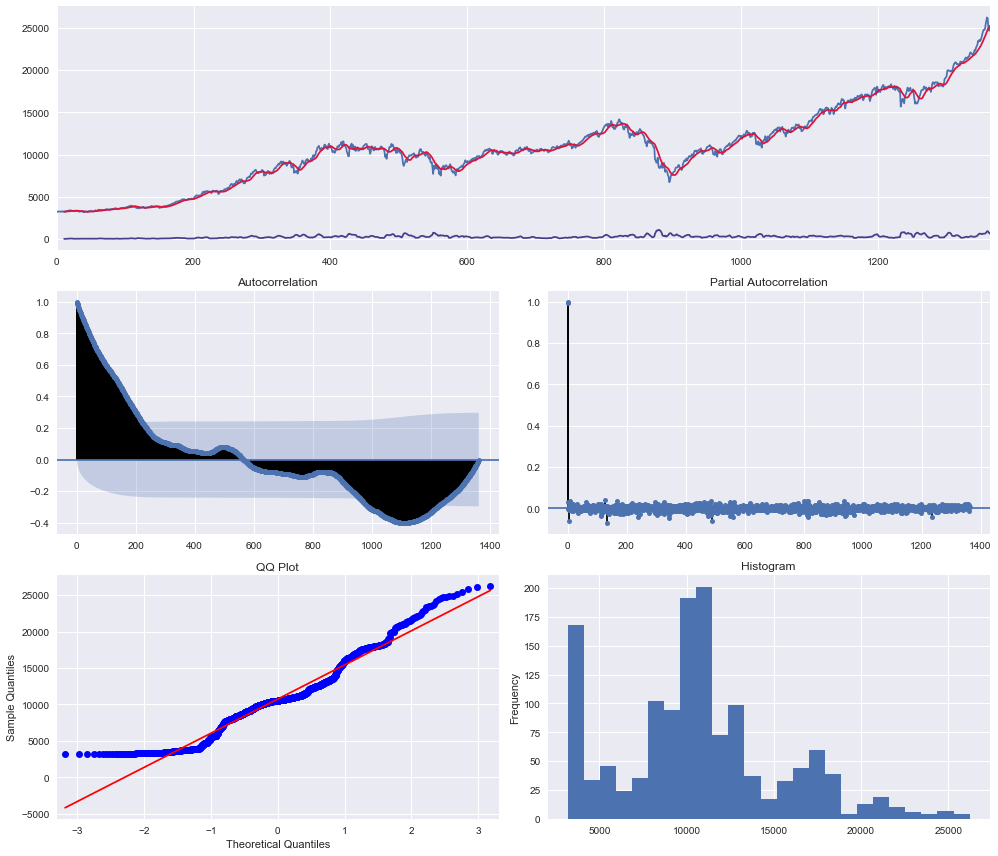

Results of Dickey-Fuller test:
test statistic             1.287077
p-value                    0.996536
# of lags                  2.000000
# of observations       1361.000000
Critical Value (1%)       -3.435164
Critical Value (5%)       -2.863666
Critical Value (10%)      -2.567902
dtype: float64


In [90]:
 ts_diagnostics(ac)

/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  from ipykernel import kernelapp as app
/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  app.launch_new_instance()
/Users/charleneyu1221/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


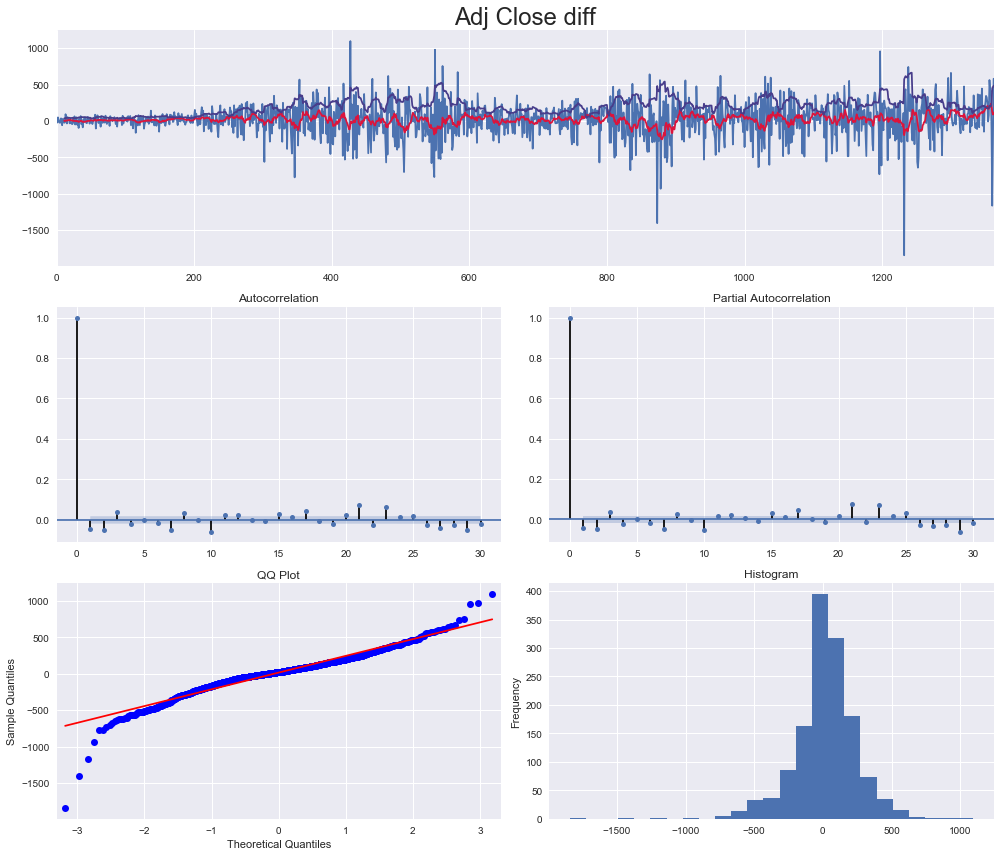

Results of Dickey-Fuller test:
test statistic           -27.946011
p-value                    0.000000
# of lags                  1.000000
# of observations       1361.000000
Critical Value (1%)       -3.435164
Critical Value (5%)       -2.863666
Critical Value (10%)      -2.567902
dtype: float64


In [91]:
# difference time series
ac_diff = np.diff(ac)
 
# compute time series diagnostics
ts_diagnostics(ac_diff, lags=30, title='Adj Close diff', filename='adf_diff')


#Stationarized data
The DF test statistic is smaller than the one and fife percent critical values. However, since there are spikes in the ACF and PACF plots which lie outsite the insignificant zone it can be concluded that the residuals are still not random. This implies that there is an information pattern left in the residuals which can be extracted by autoregressive and moving average models.


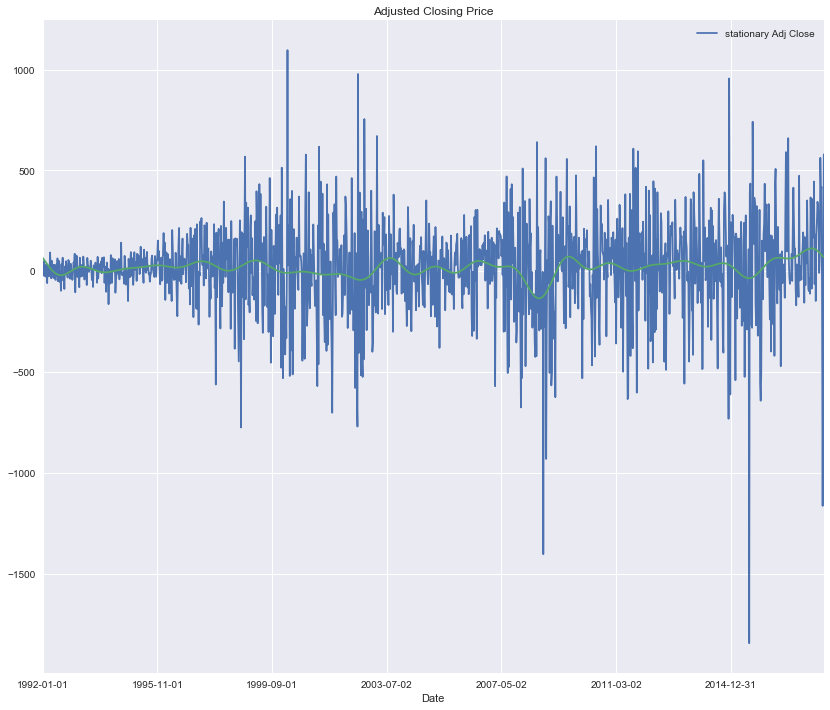

In [105]:
data = pd.read_csv("^DJI.csv")
df = data[['Date','Adj Close']]
df=df.drop(df.index[len(df)-1])
df['stationary Adj Close'] = ac_diff
df=df.set_index('Date')
y=ac_diff
rft = np.fft.rfft(y)
rft[20:] = 0   # Note, rft.shape = 21
y_smooth = np.fft.irfft(rft)
df['stationary Adj Close'].plot(legend=True, figsize=(14, 12), title='Adjusted Closing Price')
plt.plot(y_smooth, label='Smoothed')
fig.savefig('DJI_FFT.png')

#fft on stationary-data
y=ac_diff
rft = np.fft.rfft(y)
rft[20:] = 0   # Note, rft.shape = 21
y_smooth = np.fft.irfft(rft)
fig = plt.figure(figsize=(14, 12))
plt.xticks(x, pos)
plt.plot(x,y, label='Original')
plt.plot(x, y_smooth, label='Smoothed')
plt.legend(loc=0).draggable()

plt.show()


#another way to Stationarize data
#gives us similiar result as above
#log difference time series
ac_log_diff = np.log(ac).diff().dropna()
 
#compute time series diagnostics
ts_diagnostics(ac_log_diff, lags=30, title='Adj Close log', filename='adf_log_diff')

Trying to to ARIMA time series model
References: http://dacatay.com/data-science/part-4-time-series-prediction-arima-python/

print(len(ac))
# split into training and test sets
y_train = ac[:800]
y_test = ac[800:]

import itertools
# define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# generate all different combinations of p, d and q triplets
#pdq = itertools.product(p, d, q)
pdq = [item for item in itertools.product(p, d, q) ]
print(pdq)
# generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print(seasonal_pdq)

import sys
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
